<a href="https://colab.research.google.com/github/HyelinNAM/TIL/blob/master/0115_Pytorch)Classifier_%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Pytorch tutorial - Classifier 학습하기
# https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html

In [0]:
# CIFAR10 불러오기, 정규화

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) ]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


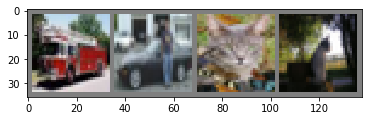

truck!,  car!,  cat!,  cat


In [0]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('!,'.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

net = Net()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [0]:
for epoch in range(2):

  running_loss = 0.0
  
  for i, data in enumerate(trainloader,0):
    inputs, labels = data 

    optimizer.zero_grad()
    
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %(epoch + 1, i+1, running_loss/2000))
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.213
[1,  4000] loss: 1.905
[1,  6000] loss: 1.704
[1,  8000] loss: 1.603
[1, 10000] loss: 1.531
[1, 12000] loss: 1.463
[2,  2000] loss: 1.397
[2,  4000] loss: 1.369
[2,  6000] loss: 1.362
[2,  8000] loss: 1.323
[2, 10000] loss: 1.296
[2, 12000] loss: 1.273
Finished Training


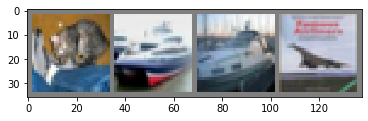

GroundTruth:    cat  ship  ship plane


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images)

print(outputs)

_, predicted = torch.max(outputs,1)

print(_)
print(predicted)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

tensor([[ 0.1151, -1.1287,  1.4685,  2.8398, -1.3709,  1.8353,  0.4720, -1.6140,
          1.0263, -1.6089],
        [ 6.8672, 10.5077, -4.2563, -4.5354, -3.7890, -7.9927, -6.7650, -5.6481,
          9.6974,  7.3890],
        [ 2.7155,  4.7609, -1.6063, -1.3658, -2.5039, -3.5490, -2.8925, -2.3147,
          4.4791,  3.8545],
        [ 5.6857,  4.0498,  0.1488, -2.1213, -2.6507, -5.6418, -4.1484, -3.6628,
          6.5619,  1.9768]], grad_fn=<AddmmBackward>)
tensor([ 2.8398, 10.5077,  4.7609,  6.5619], grad_fn=<MaxBackward0>)
tensor([3, 1, 1, 8])
Predicted:    cat   car   car  ship


In [0]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 72 %
Accuracy of  bird : 38 %
Accuracy of   cat : 38 %
Accuracy of  deer : 30 %
Accuracy of   dog : 42 %
Accuracy of  frog : 70 %
Accuracy of horse : 54 %
Accuracy of  ship : 72 %
Accuracy of truck : 68 %
